In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
from matplotlib import colors
import deepxde as dde

/tmp/ipykernel_126416/1555995876.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
from problem import Heat_Diffusion_1T
from model import PDE_basis, TrainLS
# from my_utils import plot_2d_tri, plot_domain_2d

In [17]:
data = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/data-Heat-z3b1g2Dul-1.npz', allow_pickle=True)
my_prob = Heat_Diffusion_1T(case='z3b1g2Dul', data=data)
timestep = 1 / 1000
print(my_prob)

***************************************************
Heat_diffusion_1T (case=z3b1g2Dul):
	x_pde:   	(4229225, 3)
	x_bd:    	(260260, 3)
	x_ic:    	(4225, 3)
	x_test:    	(4229225, 3)
***************************************************


In [30]:
#k = 4225
#basis_num_vec = np.array([k, 2*k, 3*k, 4*k, 5*k, 6*k, 7*k, 8*k])
#shape_vec = np.array([1, 2, 3, 4, 5, 6, 6, 6])
#basis_num_vec = np.linspace(100, 1000, 10).astype(int)
#shape_vec = 1*np.ones_like((basis_num_vec))
shape_vec = np.linspace(0.5, 1.5, 11)
basis_num_vec = 600 * np.ones_like((shape_vec)).astype(int)
print(shape_vec)
print(basis_num_vec)

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
[600 600 600 600 600 600 600 600 600 600 600]


In [31]:
for j in range(len(basis_num_vec)):
    basis_num = basis_num_vec[j]
    shape = shape_vec[j]
    basis = PDE_basis(x_dim=3, basis_num=basis_num, nlin_type='tanh')
    basis.init_pde_basis(shape=shape, radius=1.8)
    train_ls = TrainLS(problem=my_prob, basis=basis)
    l = 4225
    i = 1
    x_ic = my_prob.x_ic
    u_old = my_prob.target_test['u'][(i-1)*l:i*l]
    target_constrain = my_prob.target_test['u'][(i-1)*l:i*l]
    condition = my_prob.x_pde[:, 0].astype(np.float32) == i * timestep
    x_pde = my_prob.x_pde[condition]
    condition = my_prob.x_bd[:, 0].astype(np.float32) == i * timestep
    x_bd = my_prob.x_bd[condition]
    condition = my_prob.x_test[:, 0].astype(np.float32) == i * timestep
    x_in = my_prob.x_test[condition]
    target_in = my_prob.target_test['u'][i*l:(i+1)*l]
    coef_sol, info1 = train_ls.ls_pde(x_pde,x_bd,x_ic,u_old,target_constrain,timestep_initial=False,current_ceof=None,weights=None,ls_mse=True,item_mse=False)
    mse_test, l2_test, info2 = train_ls.get_mse_test(x_in, target_in, coef_sol=coef_sol)
    print(basis_num, shape, 'Test MSE:', mse_test, 'Test l2:', l2_test)

600 0.5 Test MSE: 2.1632874278357277 Test l2: 0.30960493622749113
600 0.6 Test MSE: 2.0436428819228585 Test l2: 0.3009215336905739
600 0.7 Test MSE: 2.036648128103379 Test l2: 0.3004061118829748
600 0.8 Test MSE: 2.06000731802817 Test l2: 0.3021239434882477
600 0.9 Test MSE: 2.1264610434930353 Test l2: 0.306958368980231
600 1.0 Test MSE: 2.1446421687037405 Test l2: 0.3082678146190236
600 1.1 Test MSE: 2.146041928874988 Test l2: 0.3083683979775135
600 1.2000000000000002 Test MSE: 2.1496301294882367 Test l2: 0.30862608761811977
600 1.3 Test MSE: 2.2216755201335823 Test l2: 0.31375530525086337
600 1.4 Test MSE: 2.143100128159681 Test l2: 0.3081569693333065
600 1.5 Test MSE: 2.187715771519748 Test l2: 0.31134809440132033


In [10]:
basis = PDE_basis(x_dim=3, basis_num=600, nlin_type='tanh')
basis.init_pde_basis(shape=0.7, radius=1.8)
train_ls = TrainLS(problem=my_prob, basis=basis)
l = 4225
i = 10
x_ic = my_prob.x_ic
u_old = my_prob.target_test['u'][(i-1)*l:i*l]
target_constrain = my_prob.target_test['u'][(i-1)*l:i*l]
condition = my_prob.x_pde[:, 0].astype(np.float32) == i * timestep
x_pde = my_prob.x_pde[condition]
condition = my_prob.x_bd[:, 0].astype(np.float32) == i * timestep
x_bd = my_prob.x_bd[condition]
condition = my_prob.x_test[:, 0].astype(np.float32) == i * timestep
x_in = my_prob.x_test[condition]
target_in = my_prob.target_test['u'][i*l:(i+1)*l]
coef_sol, info1 = train_ls.ls_pde(x_pde,x_bd,x_ic,u_old,target_constrain,timestep_initial=False,current_ceof=None,weights=None,ls_mse=True,item_mse=False)
mse_test, l2_test, info2 = train_ls.get_mse_test(x_in, target_in, coef_sol=coef_sol)
print('Test MSE:', mse_test, 'Test l2:', l2_test)

Test MSE: 1.0669778189233409e-05 Test l2: 0.06642697801777676


In [14]:
basis = PDE_basis(x_dim=3, basis_num=600, nlin_type='tanh')
basis.init_pde_basis(shape=0.7, radius=1.8)
train_ls = TrainLS(problem=my_prob, basis=basis)
l = 4225
i = 10
x_ic = my_prob.x_ic
u_old = my_prob.target_test['u'][(i-1)*l:i*l]
target_constrain = my_prob.target_test['u'][(i-1)*l:i*l]
condition = my_prob.x_pde[:, 0].astype(np.float32) == i * timestep
x_pde = my_prob.x_pde[condition]
condition = my_prob.x_bd[:, 0].astype(np.float32) == i * timestep
x_bd = my_prob.x_bd[condition]
condition = my_prob.x_test[:, 0].astype(np.float32) == i * timestep
x_in = my_prob.x_test[condition]
target_in = my_prob.target_test['u'][i*l:(i+1)*l]
coef_sol, info1 = train_ls.ls_pde_picard(x_pde,x_bd,x_ic,u_old,target_constrain,max_iter=20,weights=None,verbose=True)
mse_test, l2_test, info2 = train_ls.get_mse_test(x_in, target_in, coef_sol=coef_sol)
print('Test MSE:', mse_test, 'Test l2:', l2_test)

iter 0	ls_mse=8.361727481176592e-06
iter 1	ls_mse=1.2841172733551698e-05
iter 2	ls_mse=7.98671055373e-06
iter 3	ls_mse=8.542758257341209e-06
iter 4	ls_mse=1.1774078200841567e-05
iter 5	ls_mse=9.03342232976529e-06
iter 6	ls_mse=8.512326829085794e-06
iter 7	ls_mse=8.81464685340797e-06
iter 8	ls_mse=8.283456986536952e-06
iter 9	ls_mse=1.2256272235524916e-05
iter 10	ls_mse=9.607345153568578e-06
iter 11	ls_mse=1.2197718110701763e-05
iter 12	ls_mse=1.1275732606150364e-05
iter 13	ls_mse=7.653873953341948e-06
iter 14	ls_mse=8.569150170403086e-06
iter 15	ls_mse=1.3823760247652007e-05
iter 16	ls_mse=1.1128645402695298e-05
iter 17	ls_mse=1.3924799452774658e-05
iter 18	ls_mse=9.772424767041441e-06
iter 19	ls_mse=8.637282068279321e-06
Test MSE: 7.959773955277799e-06 Test l2: 0.05737426925110208


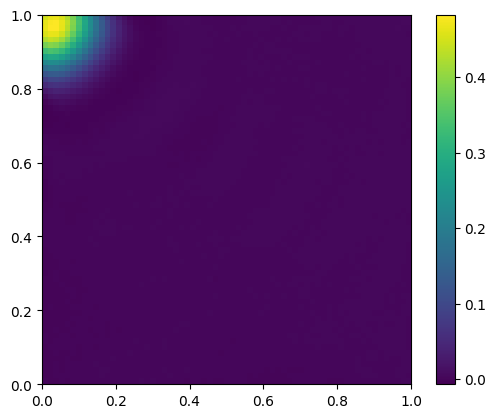

In [15]:
u_pred = info2['u_fitted']
u_fitted = u_pred.reshape((65, 65)).T
plt.imshow(u_fitted, extent=[0,1,0,1])
plt.colorbar()
plt.show()

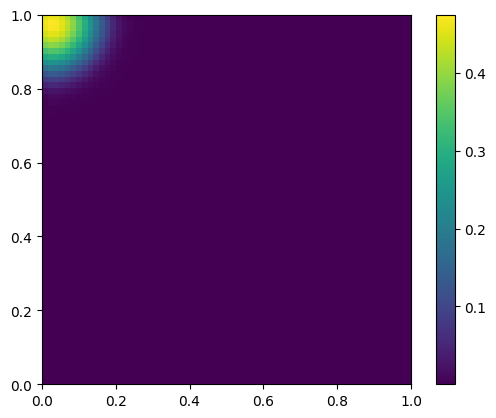

In [16]:
u_fitted = target_in.reshape((65, 65)).T
plt.imshow(u_fitted, extent=[0,1,0,1])
plt.colorbar()
plt.show()

In [12]:
basis = PDE_basis(x_dim=3, basis_num=600, nlin_type='tanh')
basis.init_pde_basis(shape=0.7, radius=1.8)
train_ls = TrainLS(problem=my_prob, basis=basis)
heat_pre = []
coef = []
l = 4225
'''
# initial
x_ic = my_prob.x_ic
target_constrain = np.zeros_like(my_prob.target_test['u'][:l])
condition = my_prob.x_pde[:, 0].astype(np.float32) == 0
x_pde = my_prob.x_pde[condition]
condition = my_prob.x_bd[:, 0].astype(np.float32) == 0
x_bd = my_prob.x_bd[condition]
condition = my_prob.x_test[:, 0].astype(np.float32) == 0
x_in = my_prob.x_test[condition]
target_in = my_prob.target_test['u'][:l]
coef_sol, info1 = train_ls.ls_pde(x_pde,x_bd,x_ic,target_constrain,timestep_initial=True,current_ceof=None,weights=None,ls_mse=True,item_mse=False)
mse_test, l2_test, info2 = train_ls.get_mse_test(x_in, target_in, coef_sol=coef_sol)
print('timestep: 0', 'Test MSE:', mse_test, 'Test l2:', l2_test)
u_fitted = info2['u_fitted'].reshape((65, 65)).T
u_fitted = np.expand_dims(u_fitted, axis=0)
heat_pre.append(u_fitted)
coef.append(coef_sol['u'])
'''
# others
x_ic = my_prob.x_ic
u_old = my_prob.target_test['u'][:l]
target_constrain = my_prob.target_test['u'][:l]
for i in range(1, 1001):
    condition = my_prob.x_pde[:, 0].astype(np.float32) == i * timestep
    x_pde = my_prob.x_pde[condition]
    condition = my_prob.x_bd[:, 0].astype(np.float32) == i * timestep
    x_bd = my_prob.x_bd[condition]
    condition = my_prob.x_test[:, 0].astype(np.float32) == i * timestep
    x_in = my_prob.x_test[condition]
    target_in = my_prob.target_test['u'][i*l:(i+1)*l]
    coef_sol, info1 = train_ls.ls_pde(x_pde,x_bd,x_ic,u_old,target_constrain,timestep_initial=False,current_ceof=None,weights=None,ls_mse=True,item_mse=False)
    mse_test, l2_test, info2 = train_ls.get_mse_test(x_in, target_in, coef_sol=coef_sol)
    print(i, 'Test mse:', mse_test, 'Test l2:', l2_test)
    u_pred = info2['u_fitted']
    u_min = 1e-6 * np.ones_like(u_pred)
    u_pred = np.maximum(u_pred, u_min)
    u_old = u_pred
    target_constrain = u_pred
    u_fitted = u_pred.reshape((65, 65)).T
    u_fitted = np.expand_dims(u_fitted, axis=0)
    heat_pre.append(u_fitted)
    coef.append(coef_sol['u'])
heat_pre = np.concatenate(heat_pre, axis=0)
coef = np.concatenate(coef, axis=1)
np.save('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/Heat-z3b1g2Dul-tanh', heat_pre)
np.save('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/coef-tanh', coef)

1 Test mse: 1.9613275910562007 Test l2: 0.29479888191742254
2 Test mse: 3.622157201076848 Test l2: 0.4829792710399647
3 Test mse: 4.752389521535588 Test l2: 0.6241009257930582
4 Test mse: 4.975964907655417 Test l2: 0.69791731491902
5 Test mse: 4.216797314805354 Test l2: 0.6893545465821472
6 Test mse: 3.5940572893078993 Test l2: 0.6747458025755837
7 Test mse: 3.122972205909126 Test l2: 0.6612811255377128
8 Test mse: 2.7419415064534136 Test l2: 0.6474225581926272
9 Test mse: 2.4369373697423673 Test l2: 0.6346863701101043
10 Test mse: 2.185095714316356 Test l2: 0.6225863098783864
11 Test mse: 1.9786832289128808 Test l2: 0.6118379205485034
12 Test mse: 1.8052493137084316 Test l2: 0.6019854262105079
13 Test mse: 1.6580983385670183 Test l2: 0.5929956282018246
14 Test mse: 1.5314184077645847 Test l2: 0.5846805075926442
15 Test mse: 1.421631164018268 Test l2: 0.5770260851143554
16 Test mse: 1.325359561783447 Test l2: 0.5698910437813671
17 Test mse: 1.240510960159552 Test l2: 0.5632654681562186

Heat Case1 rl2 : 4.6923e-01


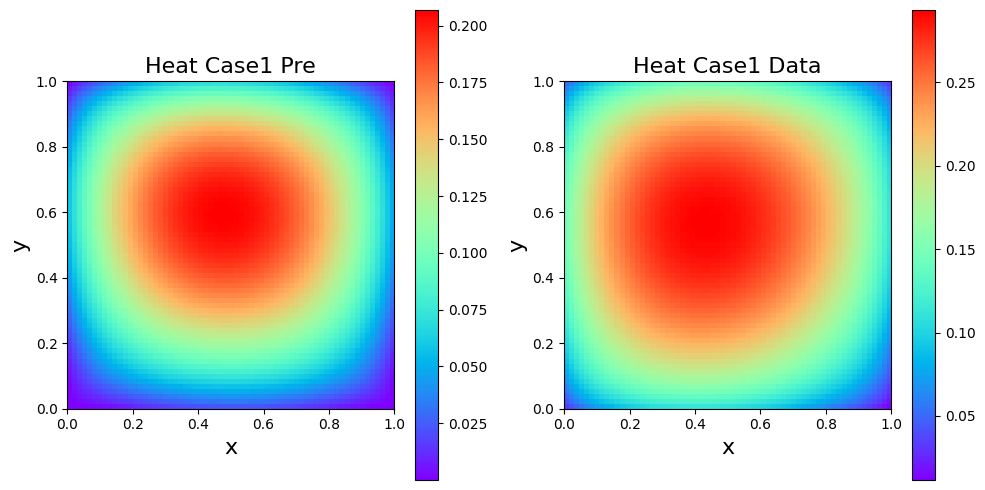

In [13]:
heat_data = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/Heat-z3b1g2Dul.npy')
heat_data = heat_data[1:, ::2, ::2]
heat_pre = np.load('/root/radiation diffusion/TransNet/radiation diffusion/Heat-1T-z3b1g2Dul/Heat-z3b1g2Dul-tanh.npy')
heat_rl2 = dde.metrics.l2_relative_error(heat_data, heat_pre)
print("Heat Case1 rl2 : {:.4e}".format(heat_rl2))

vmin_pre = np.min(heat_pre[-1])
vmax_pre = np.max(heat_pre[-1])
norm_pre = colors.Normalize(vmin=vmin_pre, vmax=vmax_pre)
vmin_data = np.min(heat_data[-1])
vmax_data = np.max(heat_data[-1])
norm_data = colors.Normalize(vmin=vmin_data, vmax=vmax_data)
 
plt.figure(figsize=(10.0,5.0))
plt.subplot(121)
plt.imshow(heat_pre[-1], norm=norm_pre, cmap=plt.get_cmap('rainbow'), extent=[0,1,0,1])
plt.title('Heat Case1 Pre', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.colorbar()
plt.clim([np.min(heat_pre[-1]), np.max(heat_pre[-1])])

plt.subplot(122)
plt.imshow(heat_data[-1], norm=norm_data, cmap=plt.get_cmap('rainbow'), extent=[0,1,0,1])
plt.title('Heat Case1 Data', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.colorbar()
plt.clim([np.min(heat_data[-1]), np.max(heat_data[-1])])
plt.tight_layout()

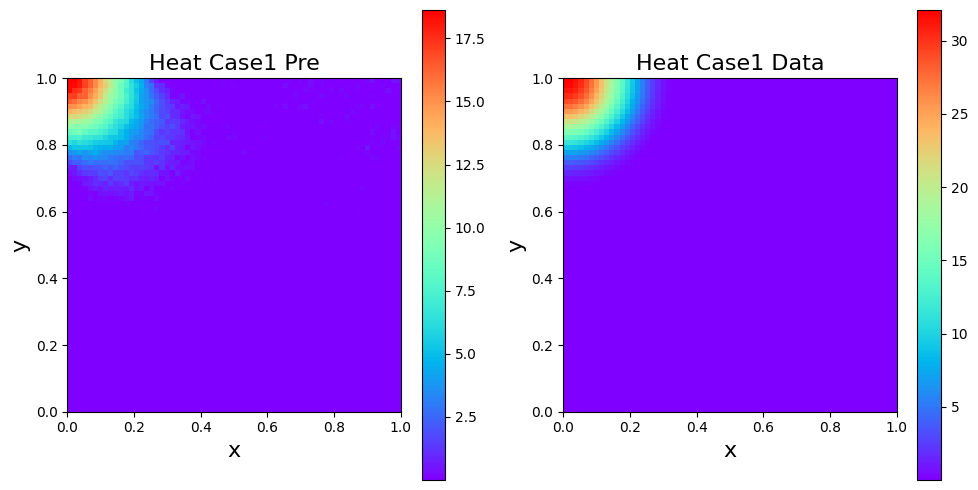

In [14]:
i = 1
vmin_pre = np.min(heat_pre[i])
vmax_pre = np.max(heat_pre[i])
norm_pre = colors.Normalize(vmin=vmin_pre, vmax=vmax_pre)
vmin_data = np.min(heat_data[i])
vmax_data = np.max(heat_data[i])
norm_data = colors.Normalize(vmin=vmin_data, vmax=vmax_data)
 
plt.figure(figsize=(10.0,5.0))
plt.subplot(121)
plt.imshow(heat_pre[i], norm=norm_pre, cmap=plt.get_cmap('rainbow'), extent=[0,1,0,1])
plt.title('Heat Case1 Pre', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.colorbar()
plt.clim([np.min(heat_pre[i]), np.max(heat_pre[i])])

plt.subplot(122)
plt.imshow(heat_data[i], norm=norm_data, cmap=plt.get_cmap('rainbow'), extent=[0,1,0,1])
plt.title('Heat Case1 Data', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.colorbar()
plt.clim([np.min(heat_data[i]), np.max(heat_data[i])])
plt.tight_layout()